# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [3]:
# Loading all the libraries

import pandas as pd

import numpy as np

import matplotlib as plot

import seaborn as sns

import scipy

In [4]:
from scipy.stats import zscore

### Load data

In [5]:
# Load the data file into a DataFrame

df = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

[Understanding the fields, explore them to make yourself familiar with the data.]

In [6]:
# print the general/summary information about the DataFrame

print(df.shape)
print(df.info())


(51525, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


In [7]:
# print a sample of data

print(display(df.head(10)))

df.isnull().sum()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


None


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Conclusions and further steps


In [8]:
# Add datetime values for when the ad was placed
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
#df['date_posted'].astype('int')
df.info()
print(df['date_posted'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB
0   2018-06-23
1   2018-10-19
2   2019-02-07
3   2019-03-22


In [9]:
# Add the vehicle's age when the ad was placed
df['post_age'] = (df['date_posted'].dt.year - df['model_year'])
df['post_age'] = df['post_age'].astype('float').abs()
print(df['post_age'].head())



0     7.0
1     NaN
2     6.0
3    16.0
4     2.0
Name: post_age, dtype: float64


## Treat missing values (if any)

In [10]:
# Fill in paint_color-Unknown,model_year-Median,cylinders-Median,odemeter-Mean
df['model_year'] = df['model_year'].fillna(df.groupby(['model'])['odometer'].transform('median'))
df['cylinders'] = df['cylinders'].fillna(df.groupby(['model'])['cylinders'].transform('median'))
df['odometer'] = df['odometer'].fillna(df.groupby(['model_year'])['odometer'].transform('median'))
df['paint_color'] = df['paint_color'].fillna('unknown')
df['is_4wd'] = df['is_4wd'].fillna(0)
df['post_age'] = df['date_posted'].dt.year - df['model_year'] + 1

df.info()
print(display(df.head()))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51518 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51517 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  post_age      51518 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 5.5+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,post_age
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,8.0
1,25500,121928.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,-119909.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7.0
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,unknown,0.0,2019-03-22,9,17.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,3.0


None


## Fix data types

In [11]:
convert_dict = {'price': float,'cylinders':int}
  
df = df.astype(convert_dict)
print(df.dtypes)

price                  float64
model_year             float64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
post_age               float64
dtype: object


## Enrich data

In [12]:
# Add the vehicle's average mileage per year
df['mileage'] = df['odometer'] / df['post_age']
print(df['mileage'].head())


0    18125.000000
1       -0.739769
2    15714.285714
3     9493.941176
4    26967.666667
Name: mileage, dtype: float64


In [13]:
# It might help to replace the condition values with something that can be manipulated more easily

cond_val = ['good', 'like new', 'fair', 'excellent', 'salvage', 'new']
cond_num = [3, 5, 2, 4, 1, 6] # the condition is numbered from 1 to 6, higher is better. 
for i in range(len(cond_val)):
    df.loc[df['condition'].str.contains(cond_val[i]), 'condition_val'] = int(cond_num[i])
    
print(df['condition_val'].head())

0    3.0
1    3.0
2    6.0
3    2.0
4    4.0
Name: condition_val, dtype: float64


## Check clean data

In [14]:
# print the general/summary information about the DataFrame

print(df.shape)
print(df.info())

(51525, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51525 non-null  float64       
 1   model_year     51518 non-null  float64       
 2   model          51525 non-null  object        
 3   condition      51525 non-null  object        
 4   cylinders      51525 non-null  int64         
 5   fuel           51525 non-null  object        
 6   odometer       51517 non-null  float64       
 7   transmission   51525 non-null  object        
 8   type           51525 non-null  object        
 9   paint_color    51525 non-null  object        
 10  is_4wd         51525 non-null  float64       
 11  date_posted    51525 non-null  datetime64[ns]
 12  days_listed    51525 non-null  int64         
 13  post_age       51518 non-null  float64       
 14  mileage        51517 non-null  float64       
 15  conditi

In [15]:
# print a sample of data

print(display(df.head(10)))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,post_age,mileage,condition_val
0,9400.0,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,8.0,18125.000000,3.0
1,25500.0,121928.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,-119909.0,-0.739769,3.0
2,5500.0,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7.0,15714.285714,6.0
3,1500.0,2003.0,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,0.0,2019-03-22,9,17.0,9493.941176,2.0
4,14900.0,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,3.0,26967.666667,4.0
5,14990.0,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,5.0,11590.800000,4.0
6,12990.0,2015.0,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,4.0,19803.000000,4.0
7,15990.0,2013.0,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,7.0,15639.000000,4.0
8,11500.0,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,7.0,14882.000000,4.0
9,9200.0,2008.0,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,12.0,12265.916667,4.0


None


## Study core parameters


          model_year
price               
1.0           2017.0
3.0           2005.0
5.0           2011.0
6.0           1999.0
9.0           2010.0
...              ...
145000.0      2008.0
175000.0      2004.0
189000.0      2014.0
300000.0      2015.0
375000.0      1999.0

[3443 rows x 1 columns]


Text(0, 0.5, 'Model Year')

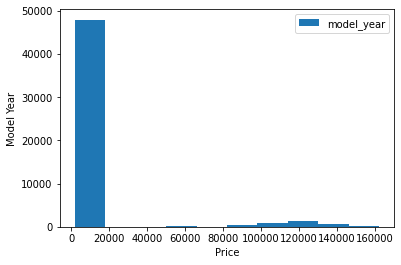

In [16]:
#
price_tbl = df.pivot_table(index='price',values='model_year',aggfunc='median')
print(price_tbl)

plot = df.plot(x="price",y="model_year",kind="hist")
plot.set_xlabel("Price")
plot.set_ylabel("Model Year")

              price
model_year         
1908.0      12995.0
1929.0      18000.0
1936.0       5000.0
1948.0      21000.0
1949.0      44900.0
...             ...
148346.0     4947.5
149245.0    13749.5
150000.0     5650.0
156000.0     6450.0
162391.0    14245.0

[163 rows x 1 columns]


Text(0, 0.5, 'Price')

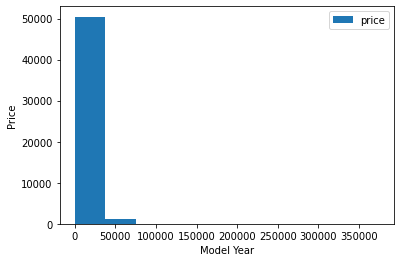

In [17]:
#
year_tbl = df.pivot_table(index='model_year',values='price',aggfunc='median')
print(year_tbl)

plot = df.plot(x="model_year",y="price",kind="hist")
plot.set_xlabel("Model Year")
plot.set_ylabel("Price")

            price
odometer         
0.0        7950.0
1.0        2149.5
2.0        4250.0
3.0        3499.0
5.0       36494.0
...           ...
840000.0   5425.0
866000.0  18500.0
920000.0   6000.0
980000.0  40000.0
990000.0  32300.0

[17813 rows x 1 columns]


Text(0, 0.5, 'Price')

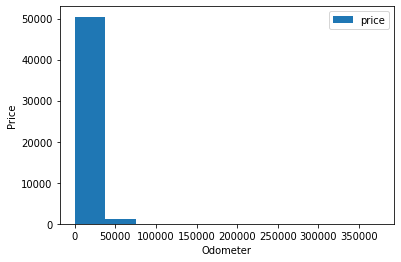

In [18]:
#
mileage_tbl = df.pivot_table(index='odometer',values='price',aggfunc='median')
print(mileage_tbl)

plot = df.plot(x="odometer",y="price",kind="hist")
plot.set_xlabel("Odometer")
plot.set_ylabel("Price")

             price
condition         
excellent  10495.0
fair        2500.0
good        7900.0
like new   13995.0
new        21999.0
salvage     2500.0


Text(0, 0.5, 'Price')

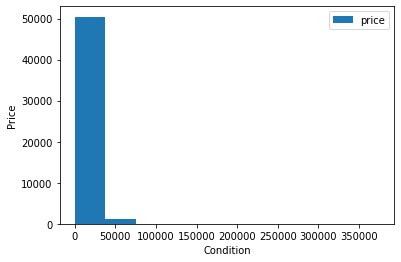

In [19]:
#
condition_tbl = df.pivot_table(index='condition',values='price',aggfunc='median')
print(condition_tbl)

plot = df.plot(x="condition",y="price",kind="hist")
plot.set_xlabel("Condition")
plot.set_ylabel("Price")

                   odometer
model                      
acura tl           141375.0
bmw x5             112000.0
buick enclave      110517.5
cadillac escalade  133327.0
chevrolet camaro    65158.0
...                     ...
toyota sienna      141861.5
toyota tacoma      124716.0
toyota tundra      127381.0
volkswagen jetta   108000.0
volkswagen passat   90000.0

[100 rows x 1 columns]


Text(0, 0.5, 'Odometer')

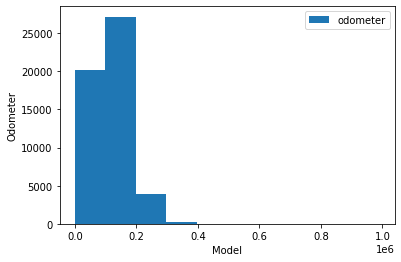

In [20]:
#
model_tbl = df.pivot_table(index='model',values='odometer',aggfunc='median')
print(model_tbl)

plot = df.plot(x="model",y="odometer",kind="hist")
plot.set_xlabel("Model")
plot.set_ylabel("Odometer")

             price
cylinders         
3           7850.0
4           6900.0
5           6497.5
6           9488.0
8          13905.0
10             1.0
12         19000.0


Text(0, 0.5, 'Price')

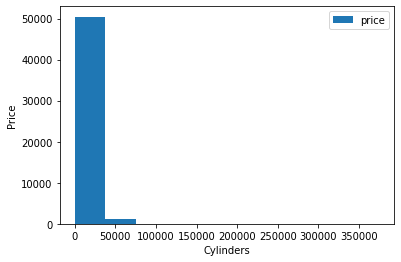

In [21]:
#
cylinders_tbl = df.pivot_table(index='cylinders',values='price',aggfunc='median')
print(cylinders_tbl)

plot = df.plot(x="cylinders",y="price",kind="hist")
plot.set_xlabel("Cylinders")
plot.set_ylabel("Price")

             price
post_age          
-160372.0  14000.0
-160371.0  14490.0
-153981.0   6675.0
-153980.0   6000.0
-147981.0   6500.0
...            ...
 70.0      44900.0
 72.0      21000.0
 83.0       5000.0
 90.0      18000.0
 111.0     12995.0

[257 rows x 1 columns]


Text(0, 0.5, 'Price')

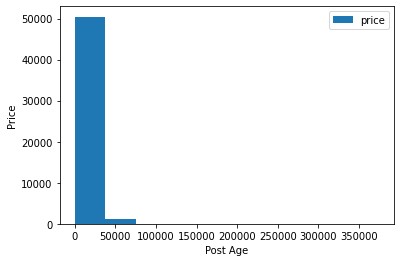

In [22]:
age_tbl = df.pivot_table(index='post_age',values='price',aggfunc='median')
print(age_tbl)

plot = df.plot(x="post_age",y="price",kind="hist")
plot.set_xlabel("Post Age")
plot.set_ylabel("Price")

## Study and treat outliers



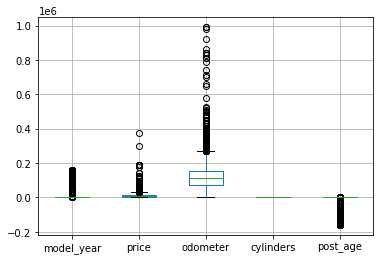

In [23]:

boxplot = df.boxplot(column=['model_year','price', 'odometer','cylinders', 'post_age'])  


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='odometer'>

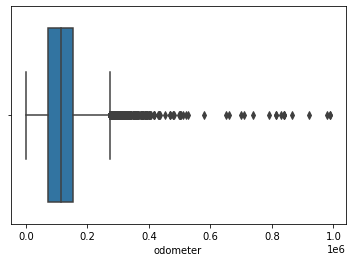

In [24]:
sns.boxplot(df['odometer'])



In [25]:
print(np.where(df['odometer']>0.4))


(array([    0,     1,     2, ..., 51522, 51523, 51524]),)


In [26]:
# Determine the lower limits for outliers
print(df['price'].min())
print(df['odometer'].min())

1.0
0.0


In [27]:
# Determine the upper limits for outliers
print(df['price'].max())
print(df['odometer'].max())

375000.0
990000.0


In [28]:
print(df['price'].describe())
print()
print(df['odometer'].describe())

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

count     51517.000000
mean     115202.837753
std       62118.678954
min           0.000000
25%       73394.000000
50%      114000.000000
75%      152876.000000
max      990000.000000
Name: odometer, dtype: float64


In [29]:
# Store data without outliers in a separate DataFrame
cols = ['odometer', 'price', 'post_age','model_year']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df)

         price  model_year           model  condition  cylinders fuel  \
0       9400.0      2011.0          bmw x5       good          6  gas   
2       5500.0      2013.0  hyundai sonata   like new          4  gas   
3       1500.0      2003.0      ford f-150       fair          8  gas   
4      14900.0      2017.0    chrysler 200  excellent          4  gas   
5      14990.0      2014.0    chrysler 300  excellent          6  gas   
...        ...         ...             ...        ...        ...  ...   
51520   9249.0      2013.0   nissan maxima   like new          6  gas   
51521   2700.0      2002.0     honda civic    salvage          4  gas   
51522   3950.0      2009.0  hyundai sonata  excellent          4  gas   
51523   7455.0      2013.0  toyota corolla       good          4  gas   
51524   6300.0      2014.0   nissan altima       good          4  gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
0      145000.0    automatic     SUV     unknown   

## Study core parameters without outliers

         model_year
price              
1.0          2017.0
3.0          2005.0
5.0          2011.0
6.0          1999.0
9.0          2010.0
...             ...
34499.0      2017.0
34500.0      2018.0
34545.0      2017.0
34555.0      2018.0
34595.0      2015.0

[2890 rows x 1 columns]


Text(0, 0.5, 'Price')

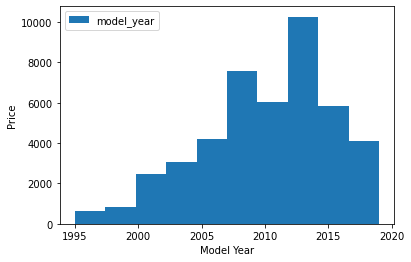

In [30]:
price_tbl = df.pivot_table(index='price',values='model_year',aggfunc='median')
print(price_tbl)

plot = df.plot(x="price",y="model_year",kind="hist")
plot.set_xlabel("Model Year")
plot.set_ylabel("Price")

              mileage
price                
1.0      14400.000000
3.0      10928.571429
5.0      15442.250000
6.0       8261.904762
9.0         11.900000
...               ...
34499.0  61593.500000
34500.0  20559.250000
34545.0  15161.000000
34555.0  22403.000000
34595.0  21614.000000

[2890 rows x 1 columns]


Text(0, 0.5, 'Mileage')

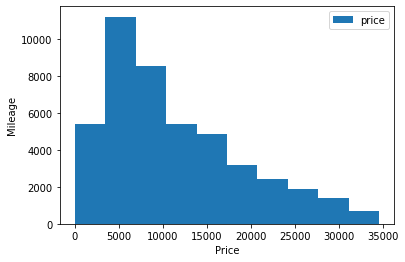

In [31]:
mileage_tbl = df.pivot_table(index='price',values='mileage',aggfunc='median')
print(mileage_tbl)

plot = df.plot(x="mileage",y="price",kind="hist")
plot.set_xlabel("Price")
plot.set_ylabel("Mileage")

            price
odometer         
0.0        7969.0
1.0        1375.0
2.0        4250.0
3.0        3499.0
5.0       30000.0
...           ...
271000.0   6900.0
271118.0  13900.0
271175.0   2600.0
271914.0   3995.0
272000.0  11500.0

[15896 rows x 1 columns]


Text(0, 0.5, 'Price')

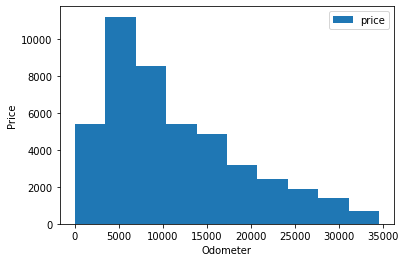

In [32]:
odometer_tbl = df.pivot_table(index='odometer',values='price',aggfunc='median')
print(odometer_tbl)

plot = df.plot(x="odometer",y="price",kind="hist")
plot.set_xlabel("Odometer")
plot.set_ylabel("Price")

            price
post_age         
1.0       20000.0
2.0       18650.0
3.0       17500.0
4.0       16995.0
5.0       14500.0
6.0       12495.0
7.0       10200.0
8.0        9995.0
9.0        8500.0
10.0       6995.0
11.0       6999.0
12.0       6500.0
13.0       5990.0
14.0       5000.0
15.0       5000.0
16.0       4500.0
17.0       4000.0
18.0       3995.0
19.0       3700.0
20.0       3500.0
21.0       3300.0
22.0       3800.0
23.0       3500.0
24.0       3500.0
25.0       3498.5


Text(0, 0.5, 'Price')

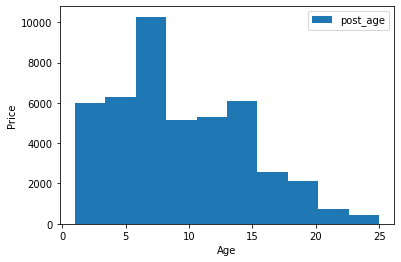

In [33]:
age_tbl = df.pivot_table(index='post_age',values='price',aggfunc='median')
print(age_tbl)

plot = df.plot(x="price",y="post_age",kind="hist")
plot.set_xlabel("Age")
plot.set_ylabel("Price")

## Ads lifetime


In [34]:
df.pivot_table(index='date_posted',values= 'days_listed',aggfunc=['mean','median'])

,mean,median
,days_listed,days_listed
date_posted,,
2018-05-01,35.879630,31.0
2018-05-02,40.529412,33.0
2018-05-03,39.013889,34.0
2018-05-04,40.218045,32.0
2018-05-05,42.981481,35.5
...,...,...
2019-04-15,36.616541,32.0
2019-04-16,35.865546,31.0


## Average price per each type of vehicle

In [35]:
price_stat = df.pivot_table(index='type', values='price',aggfunc=['mean','median'])
ads_stat = df.groupby(['type'])['date_posted'].count()
print(price_stat)
print(ads_stat)

                     mean   median
                    price    price
type                              
SUV          10451.024351   8800.0
bus          18107.428571  28990.0
convertible  12918.121875  12991.5
coupe        13530.282528  12995.0
hatchback     6855.452406   5990.0
mini-van      8051.369014   6495.0
offroad      14422.224138  12500.0
other        10346.174528   8925.0
pickup       15088.125257  14000.0
sedan         7000.896435   5995.0
truck        15099.292808  14729.0
van           8749.543478   7495.0
wagon         8989.247674   7900.0
type
SUV            11047
bus               21
convertible      320
coupe           1883
hatchback        935
mini-van        1065
offroad          174
other            212
pickup          5836
sedan          11191
truck          10372
van              552
wagon           1397
Name: date_posted, dtype: int64


In [41]:
sedan_dataset = df.query('type == "sedan"')
truck_dataset = df.query('type == "truck"')

## Price factors

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45005 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          45005 non-null  float64       
 1   model_year     45005 non-null  float64       
 2   model          45005 non-null  object        
 3   condition      45005 non-null  object        
 4   cylinders      45005 non-null  int64         
 5   fuel           45005 non-null  object        
 6   odometer       45005 non-null  float64       
 7   transmission   45005 non-null  object        
 8   type           45005 non-null  object        
 9   paint_color    45005 non-null  object        
 10  is_4wd         45005 non-null  float64       
 11  date_posted    45005 non-null  datetime64[ns]
 12  days_listed    45005 non-null  int64         
 13  post_age       45005 non-null  float64       
 14  mileage        45005 non-null  float64       
 15  condition_val  4500

                    price
transmission             
automatic     7110.364906
manual        5463.184843
other         4417.322581
                     price
transmission              
automatic     15440.038075
manual        10048.590116
other          6057.067039


<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

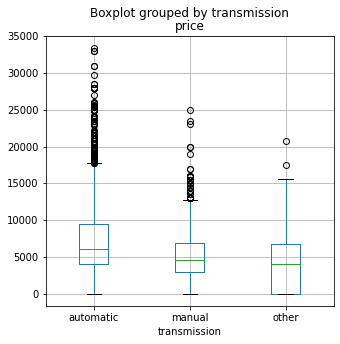

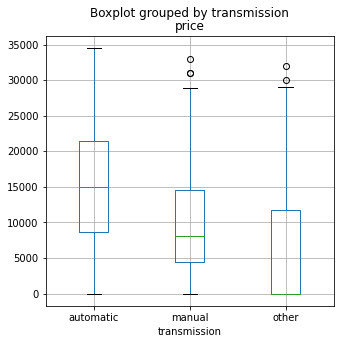

In [46]:
transmission_type = sedan_dataset.pivot_table(index='transmission', values='price')
transmission_type_two = truck_dataset.pivot_table(index='transmission', values='price')
print(transmission_type)
print(transmission_type_two)

sedan_dataset.boxplot(column='price',by='transmission',figsize=(5,5))
truck_dataset.boxplot(column='price',by='transmission',figsize=(5,5))


## General conclusion

     Over the past few years I have been an analyst at Crankshaft list and was given the task to identify which factors are instrumental in determining the price of a vehicle. During my analyzing the raw data I realized many small problems such as Date columns being listed as intergers, missing values in columns with pertinant information, outliers in data raising mean/median values for the whole dataset giving us inaccurate readings and missing columns which would make data manipulation easier. I first fixed the missing data problems by grouping by median of the colum. I then added a necessary column in order to find the post age by subtracting list date by car age and adding 1 to all of the rows that were owned for less than a year. After fixing the data problems I created 3 new columns that would make data manipulation easier.                                                                      I then started to create charts in order to show the data in a better form to see its effect to price. I noticed some values that were very large or small compared to median values so I removed outliers from the columns that featured them. This gave me the ability to only shape data that I really needed to work with. I created boxplots, bar charts, histograms and pivot tables in order to visualize the data that is free from outliers.                                                            I noticed from the two most important car types ( Truck and Sedan) that automatic's sold significantly more compared to manual(Sedan-$1,600 more , Truck-$6,400 more). This shows that automatic' s have huge influence as compared to price. The second observation gained from reading data was age of the car, the newer the car the more it was priced. Cars that were 1 year old had a price of $19,000 whilst cars of 23 years of age had a price of $3,900.                                               